# 🚩Problem Definition

The objective of this project is to build a sales forecasting model that predicts the sales of product families at Favorita stores in Ecuador. Using the historical sales data, along with the provided features such as store information, promotional data, oil prices, and holidays/events, the model should accurately forecast the sales for the given test dates.

The sales forecasting model will assist Favorita in optimizing inventory management, planning promotions, and meeting customer demand effectively. Accurate sales predictions can help in making informed business decisions, ensuring optimal stock levels, and maximizing profitability.

# 💾 Data Loading

### Data:
1. **train.csv**: Sales time series data with features like `store_nbr`, `family`, and `onpromotion`.
2. **test.csv**: Similar to `train.csv`, used for sales prediction on provided dates.
3. **sample_submission.csv**: Sample submission file format for predictions.
4. **stores.csv**: Store metadata including `city`, `state`, `type`, and `cluster` grouping.
5. **oil.csv**: Daily oil prices, important for Ecuador's oil-dependent economy.
6. **holidays_events.csv**: Information on holidays and events, including transferred dates and bridge days.

### How to?:
 1. Import `load_data` from `data_preprocessing.py`, this shall return you the dataframes of the said csv's.
 


In [1]:
import data_preprocessing as dp
import util as ut

train_data, test_data, stores_data, oil_data, holidays_data = dp.load_data()


In [2]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [4]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
holidays_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


# 🧭 Exploration

### What to do?
1. Understand the structure and contents of your data by examining the DataFrame.
2. Use descriptive methods and functions like `head()`, `info()`, and `describe()` to get an overview of the data.
3. Check for missing values using functions like `isnull()` or `isna()` and handle them if necessary.
4. Perform data transformations and cleaning, such as removing unnecessary columns or converting data types.
5. Visualize the data using plots, histograms, box plots, scatter plots, or any other relevant visualizations to gain insights into the data distribution, patterns, and relationships.

### How to?
1. Go ahead and clean the data sets note the cleaning functions must be definded in the `data_preprocessing` python script, We want to keep this notebook readable so keep out the complex code.
2. After having cleaned a dataset use `df.to_csv()` to save it inside a folder named `data_clean`.
Note: the folder MUST be named data_clean (Else it wont be ignored by git and it will try to upload the cleaned data set to github).

Help:
1. A function named `assess_data()` has been defined in `data_preprocessing.py`, this function returns various importatnt details about the dataframe and can prove to be quite usefull in data exploration.  


### 🏋️ Training Datatset

 **train.csv**: This file contains time series data of sales and features such as `store_nbr, family, and onpromotion`. The target variable is the `sales`, representing the total sales for a product family at a particular store on a given date.

To Do: 
1. 🧹 Clean the data set 
2. 🔎 Analysis: Figure out the most important features and retain them or List them.

  

In [7]:
# Viewing the data set
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [8]:

dp.assess_data(train_data)


,id,date,store_nbr,family,sales,onpromotion
count,3000888.0,3000888,3000888.0,3000888,3000888.0,3000888.0
mean,1500443.5,NaN,27.5,NaN,357.775749,2.60277
min,0.0,NaN,1.0,NaN,0.0,0.0
max,3000887.0,NaN,54.0,NaN,124717.0,741.0
std,866281.891642,NaN,15.585787,NaN,1101.997721,12.218882
unique_count,3000888,1684,54,33,379610,362
null_count,0,0,0,0,0,0
most_frequent_value,0,2013-01-01,1,AUTOMOTIVE,0.0,0
most_frequent_value_count,1,1782,55572,90936,939130,2389559
dtype,int64,object,int64,object,float64,int64


From the above assesment it is redily understood that we must handle the date and family columns.  

In [9]:
import pandas as pd 
train_data['date'] = pd.to_datetime(train_data['date'])
dp.assess_data(train_data)

,id,date,store_nbr,family,sales,onpromotion
count,3000888.0,3000888,3000888.0,3000888,3000888.0,3000888.0
mean,1500443.5,NaN,27.5,NaN,357.775749,2.60277
min,0.0,NaN,1.0,NaN,0.0,0.0
max,3000887.0,NaN,54.0,NaN,124717.0,741.0
std,866281.891642,NaN,15.585787,NaN,1101.997721,12.218882
unique_count,3000888,1684,54,33,379610,362
null_count,0,0,0,0,0,0
most_frequent_value,0,2013-01-01T00:00:00.000000000,1,AUTOMOTIVE,0.0,0
most_frequent_value_count,1,1782,55572,90936,939130,2389559
dtype,int64,datetime64[ns],int64,object,float64,int64


### 🧪 Test Datatset

**test.csv**: Similar to the train.csv file, this file includes the same features, and the task is to predict the sales for the dates provided in this file.

To Do: 
1. This dataset does not require any work, we will later be inputing our predictions into this table. 

### 🏪 Store Datatset

**stores.csv**: This file provides metadata for the stores, including city, state, type, and cluster. The cluster variable represents a grouping of similar stores.

To Do: 
1. 🧹 Clean the data set 
2. 🔎 Analysis: Figure out the most important features and retain them or List them.
3. Find out where to merge this dataset.

In [10]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [11]:
dp.assess_data(stores_data)

,store_nbr,city,state,type,cluster
count,54.0,54,54,54,54.0
mean,27.5,NaN,NaN,NaN,8.481481
min,1.0,NaN,NaN,NaN,1.0
max,54.0,NaN,NaN,NaN,17.0
std,15.732133,NaN,NaN,NaN,4.693395
unique_count,54,22,16,5,17
null_count,0,0,0,0,0
most_frequent_value,1,Quito,Pichincha,D,3
most_frequent_value_count,1,18,19,18,7
dtype,int64,object,object,object,int64


### ⛽🚗 Oil Datatset

**oil.csv**: Daily oil prices are included in this file. The oil price information is available for both the train and test data timeframes. It's important to note that Ecuador's economy is highly dependent on oil prices.

To Do: 
1. 🧹 Clean the data set 
2. 🔎 Analysis: Figure out the most important features and retain them or List them.
3. Find out where to merge this dataset.

In [12]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [13]:
dp.assess_data(oil_data)

,date,dcoilwtico
count,1218,1175.0
most_frequent_value,2013-01-01,46.02
most_frequent_value_count,1,4
unique_count,1218,998
null_count,0,43
dtype,object,float64
mean,NaN,67.714366
min,NaN,26.19
max,NaN,110.62
std,NaN,25.630476


In [14]:
dp.handle_missing_values(oil_data)
dp.assess_data(oil_data)

,date,dcoilwtico
count,1218,1218.0
most_frequent_value,2013-01-01,67.714366
most_frequent_value_count,1,43
unique_count,1218,999
null_count,0,0
dtype,object,float64
mean,NaN,67.714366
min,NaN,26.19
max,NaN,110.62
std,NaN,25.173606


### 🏖️ Holidays Datatset

**holidays_events.csv**: This file contains information about holidays and events, including metadata. Pay attention to the `transferred` column, as it indicates if a holiday was officially transferred to another date. Extra days added to a holiday are marked as `Bridge`.

To Do: 
1. 🧹 Clean the data set 
2. 🔎 Analysis: Figure out the most important features and retain them or List them.
3. Find out where to merge this dataset.

In [15]:
holidays_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


# 🔧 Feature Engineering

1. Encapsulate data preprocessing tasks in `data_preprocessing.py`:
2. Handle missing values by imputation or removal based on analysis.
3. Perform feature engineering, such as transforming dates, encoding categorical variables, and creating additional relevant features.
4. Apply any necessary data transformations, such as scaling or normalization.

### 🏋️ Training Datatset

 **train.csv**: This file contains time series data of sales and features such as `store_nbr, family, and onpromotion`. The target variable is the `sales`, representing the total sales for a product family at a particular store on a given date.


In [16]:
train_data = dp.feature_engineering(train_data)
train_data

,store_nbr,sales,onpromotion,date_year,date_month,date_day,family_AUTOMOTIVE,family_HOME APPLIANCES,family_Other,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES
0,1,0.000,0,2013,1,1,True,False,False,False,False,False
1,1,0.000,0,2013,1,1,False,False,True,False,False,False
2,1,0.000,0,2013,1,1,False,False,True,False,False,False
3,1,0.000,0,2013,1,1,False,False,True,False,False,False
4,1,0.000,0,2013,1,1,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,9,438.133,0,2017,8,15,False,False,True,False,False,False
3000884,9,154.553,1,2017,8,15,False,False,False,True,False,False
3000885,9,2419.729,148,2017,8,15,False,False,False,False,True,False
3000886,9,121.000,8,2017,8,15,False,False,False,False,False,True


# ⚙️ Model Selection & Training 

1. Encapsulate model training functionality in `model_training.py`:
2. Select a suitable forecasting model based on the problem requirements.
3. Implement functions or classes to handle model selection, hyperparameter tuning, and training on the training data.
4. Save the trained model for later use.
5. Encapsulate model evaluation functionality in `model_evaluation.py`:
6. Implement functions or classes to evaluate the performance of the trained model using metrics like MAE, RMSE, or others.
7. Generate evaluation reports, visualizations, or any additional analysis to assess the model's accuracy and quality.

### 🏋️ Training Datatset

 **train.csv**: This file contains time series data of sales and features such as `store_nbr, family, and onpromotion`. The target variable is the `sales`, representing the total sales for a product family at a particular store on a given date.

In [17]:
import model_training as mt
linear_model, X_test, y_test = mt.train_model(train_data, model_type='linear', target='sales')

Training model...
Sucessfully droped target col
{'MAE': 424.34177304103997, 'RMSE': 997.1387118044476, 'r2_score': 0.1999709255117913}


In [18]:
linear_model.coef_

array([   2.67749235,   36.67586906,    0.94825415,    3.076305  ,
         -1.57828351, -204.17867021, -208.16399044,   65.19978328,
       -127.18127887,  685.69818931, -211.37403307])

In [19]:
linear_model.intercept_

-1770.1763047016007

In [20]:
X_test

,store_nbr,onpromotion,date_year,date_month,date_day,family_AUTOMOTIVE,family_HOME APPLIANCES,family_Other,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES
2483653,46,61,2016,10,28,False,False,True,False,False,False
2761877,52,0,2017,4,3,False,False,True,False,False,False
1217988,33,2,2014,11,16,False,False,True,False,False,False
1231938,25,0,2014,11,24,False,False,True,False,False,False
528175,29,0,2013,10,24,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2640551,48,0,2017,1,25,False,False,True,False,False,False
1201944,33,0,2014,11,7,False,False,True,False,False,False
12974,23,0,2013,1,8,False,False,True,False,False,False
1136162,38,2,2014,10,1,False,False,True,False,False,False


In [21]:
y_test

2483653    2576.000
2761877       0.000
1217988     357.354
1231938       5.000
528175        0.000
             ...   
2640551       3.000
1201944     258.000
12974       292.884
1136162     738.464
2582492    1412.923
Name: sales, Length: 600178, dtype: float64

# 🔮 Model Prediction

1. Encapsulate prediction functionality in `model_prediction.py`:
2. Create functions or classes to load the trained model and make predictions on the test data or unseen data.
3. Format the predictions and prepare them for further analysis or visualization.

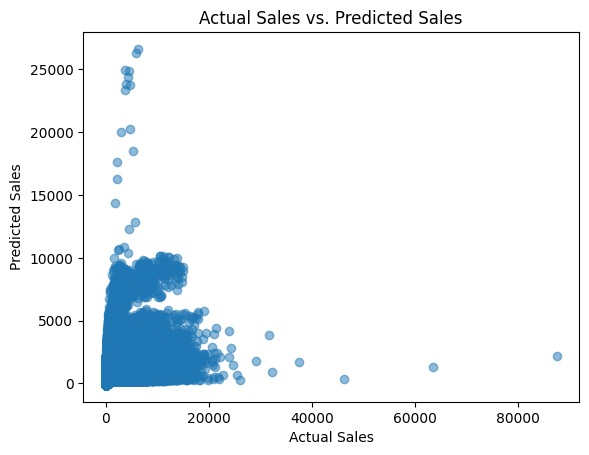

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'linear_model' is already trained

# Make predictions on the test data (X_test)
y_pred = linear_model.predict(X_test)

# Plot the graph
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs. Predicted Sales')
plt.show()



In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'time_data' contains the time information
# Assuming 'y_test' contains the actual sales values
# Assuming 'y_pred' contains the predicted sales values

# Plot the actual sales against time (blue color)
plt.scatter(date_year, y_test, color='blue', label='Actual Sales')

# Plot the predicted sales against time (orange color)
plt.scatter(time_data, y_pred, color='orange', label='Predicted Sales')

plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual Sales vs. Predicted Sales')
plt.legend()
plt.show()


NameError: name 'time_data' is not defined

# 🚀 Deployment 
1. Deploy using streamlit